In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import os
import math
import random
import numpy as np    

### Exploratory Data Analysis

In [2]:
df_loaded = pd.read_csv("data/training_set_VU_DM.csv")
display(df_loaded.describe())

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


srch_id                        4958347
date_time                      4958347
site_id                        4958347
visitor_location_country_id    4958347
visitor_hist_starrating         251866
visitor_hist_adr_usd            252988
prop_country_id                4958347
prop_id                        4958347
prop_starrating                4958347
prop_review_score              4950983
prop_brand_bool                4958347
prop_location_score1           4958347
prop_location_score2           3867999
prop_log_historical_price      4958347
position                       4958347
price_usd                      4958347
promotion_flag                 4958347
srch_destination_id            4958347
srch_length_of_stay            4958347
srch_booking_window            4958347
srch_adults_count              4958347
srch_children_count            4958347
srch_room_count                4958347
srch_saturday_night_bool       4958347
srch_query_affinity_score       317406
orig_destination_distance

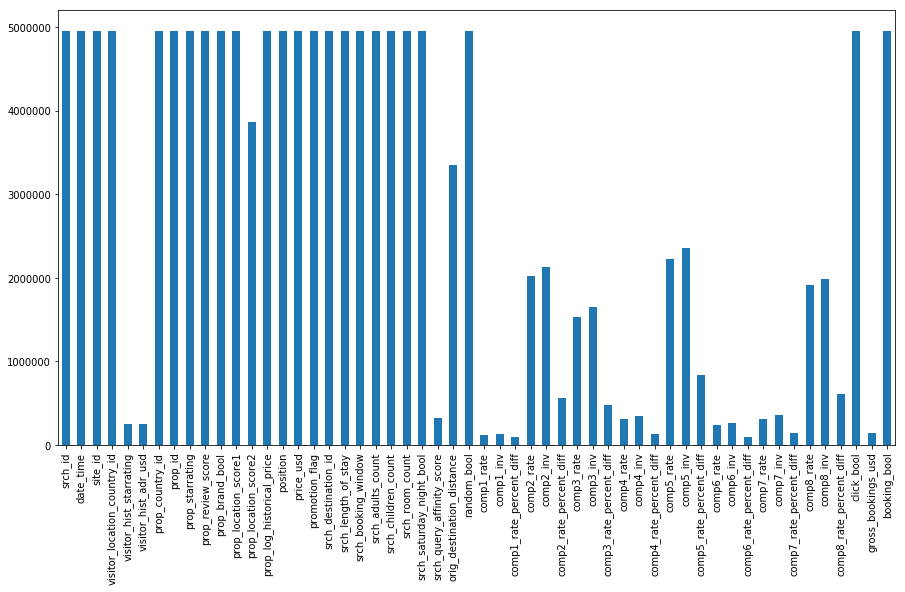

In [3]:
# temporally store
df = df_loaded

count_non_nan = df.count()
display(count_non_nan)

plt.figure(figsize=(15,8))
count_non_nan.plot.bar(width=0.5)

In [4]:
print(df["srch_id"].count())
unique_searches = df["srch_id"].nunique()
print(unique_searches)

column_values = df["srch_id"].values
unique_searches_values =  pd.unique(column_values)

print(df["date_time"].count())
print(df["date_time"].nunique())

4958347
199795
4958347
198615


In [5]:
# get 1 % of the data in a preliminary df
percent_to_keep = 1

num_to_keep = math.ceil(percent_to_keep * unique_searches/100)

print(num_to_keep)
# print("Unique searches left in dataframe: ", num_to_drop)

random_ids = np.array(random.sample(set(unique_searches_values), num_to_keep))

if os.path.exists("./df_small.pkl"):
    df_small = pd.read_pickle("./df_small.pkl")
else:
    df_small = df[df["srch_id"] == random_ids[0]]

    for i, ideetje in enumerate(random_ids[1:]):
        print(i, end=" ")
        df_temp = df[df["srch_id"] == ideetje]

        frames = [df_temp, df_small]

        df_small = pd.concat(frames)
        
    df_small.to_pickle("./df_small.pkl")

1998


### This means that we have almost 5 million rows, but these retain from 199.795 unique searches. This means that per search about 25 hotels are shown.
##### Indeed there are 199.795 unique searches, but be aware the srch_id column has gaps! For example the first id's are: 1,4,6,8,11
##### Range of number of hotels shown in a search is [5,38] consecutive (no missing number in this range)

In [6]:
print(df["prop_id"].count())
print(df["prop_id"].nunique())

4958347
129113


In [7]:
count_unique = df.nunique()

In [8]:
print(count_unique)

srch_id                        199795
date_time                      198615
site_id                            34
visitor_location_country_id       210
visitor_hist_starrating           312
visitor_hist_adr_usd             7799
prop_country_id                   172
prop_id                        129113
prop_starrating                     6
prop_review_score                  10
prop_brand_bool                     2
prop_location_score1              337
prop_location_score2             9342
prop_log_historical_price         392
position                           40
price_usd                       76465
promotion_flag                      2
srch_destination_id             18127
srch_length_of_stay                36
srch_booking_window               429
srch_adults_count                   9
srch_children_count                10
srch_room_count                     8
srch_saturday_night_bool            2
srch_query_affinity_score      199387
orig_destination_distance      530595
random_bool 

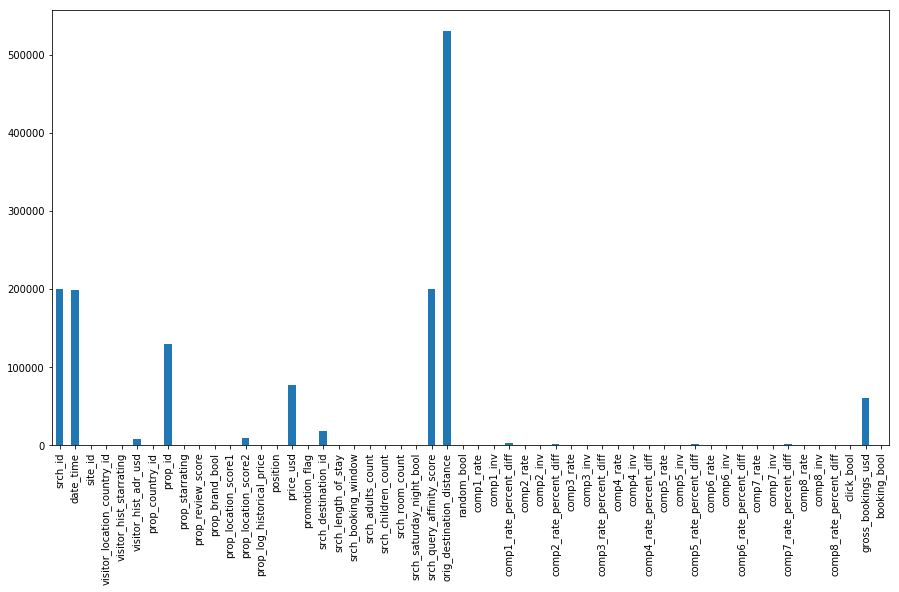

In [9]:
plt.figure(figsize=(15,8))
count_unique.plot.bar(width=0.5)

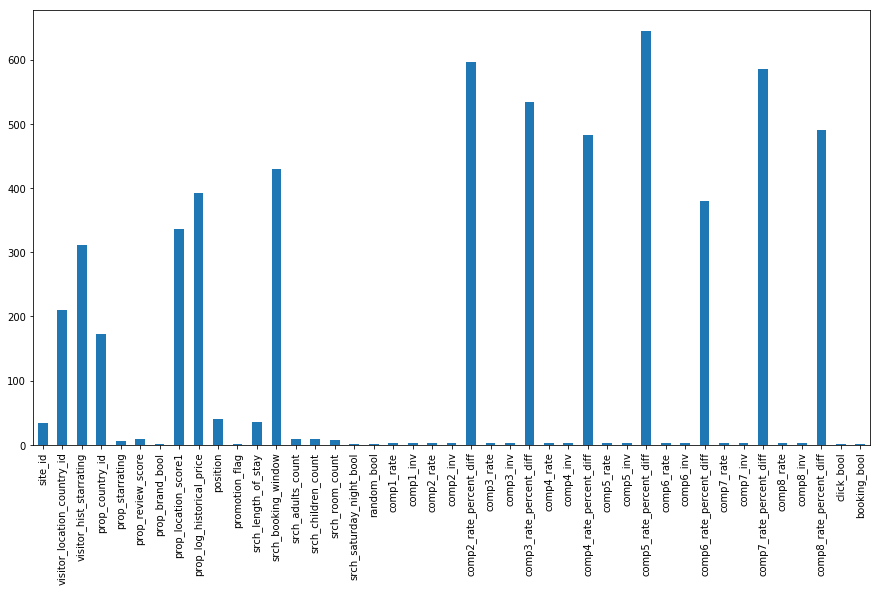

In [10]:
less_unique = count_unique.drop(labels=["srch_id", "date_time", "prop_id", "price_usd",
                                            "srch_query_affinity_score", "orig_destination_distance",
                                            "gross_bookings_usd", "srch_destination_id", "visitor_hist_adr_usd",
                                            "prop_location_score2", "comp1_rate_percent_diff"])
plt.figure(figsize=(15,8))
less_unique.plot.bar(width=0.5)

### In this dataset we count 129.113 unique hotels

In [11]:
# df = pd.read_csv("data/test_set_VU_DM.csv")
# display(df.describe())

5
38
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


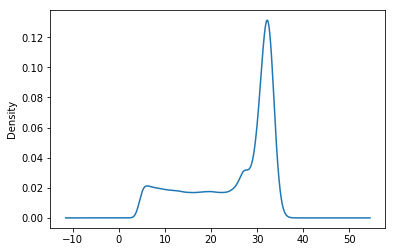

In [12]:
# Lotte Donderdag 23 april
# TODO: een kleinere dataset maken, bv van 1000 searches dat is dan ± 25.000 rows aan data

# wat pandas commands die handig zijn
# df.dtypes
# pd.isnull(df).any()
# df.query('prop_location_score2 > prop_location_score1')

def count_of_column_per_search(df, column):
    """
    Met deze code kun je de count van een bepaalde kolom (zoals 'promotion_flag') per complete search bekijken
    """
    grouped_searches = df.groupby('srch_id')[[column]].count()
    grouped_searches.sort_values(column).reset_index()
    grouped_searches.columns = ['test']
    grouped_searches


def number_of_hotels_per_search(df):
    """
    Print hoeveel hotels er per search worden weergegeven, print het minimum, maximum, en de unieke waardes
    Handig linkje: https://towardsdatascience.com/data-visualization-exploration-using-pandas-only-beginner-a0a52eb723d5
    """
    
    grouped_searches = df.groupby('srch_id')[['prop_id']].count()
    grouped_searches.sort_values('prop_id').reset_index()
    grouped_searches.columns = ['nr_hotels']
    nr_hotels = grouped_searches['nr_hotels'].unique()
    print(min(nr_hotels))
    print(max(nr_hotels))
    print(sorted(nr_hotels))
    grouped_searches['nr_hotels'].plot(kind='kde')
    
count_of_column_per_search(df=df, column='promotion_flag')
number_of_hotels_per_search(df=df)

In [13]:
# number_of_hotels_per_search(df)
def database_correlations(df):
    """
    Correlations in de database bekijken
    https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python#comments
    """
    
    kendall, spearman, pearson = None, None, None
    # Pearson correlations
    pearson = df.corr()
    
    # print(pearson['srch_id'])
    
    # Kendall tau correlations
#     df.rank()
#     kendall = df.corr('kendall')

    # Spearman rank correlations
#     spearman = df.corr('spearman')

    return kendall, spearman, pearson
    
kendall, spearman, pearson = database_correlations(df)

plots/pearson_corr.png


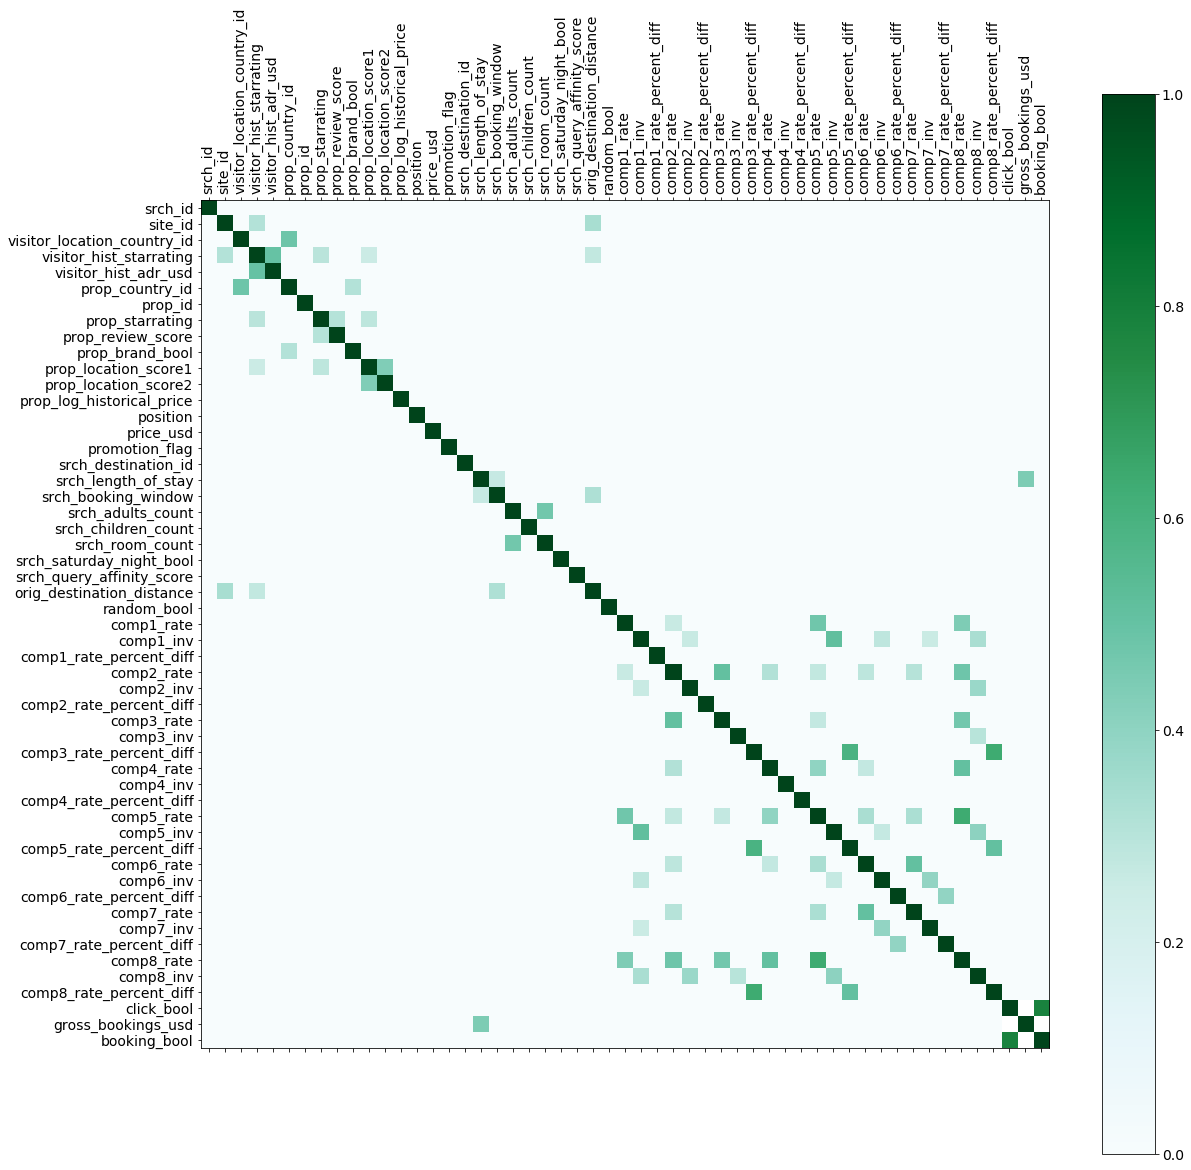

In [14]:
def correlation_plot(df_corr, figure_name):
    """
    Plot correlations
    Input arguments: the correlation matrix (can be any kind eg pearson/kendall etc), file name for the plot
    """
    f = plt.figure(figsize=(19, 19))
    
    df = df_corr.copy()
    
    df[df < 0.25] = 0
    
    plt.matshow(df, fignum=f.number, cmap='BuGn')
    plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
#     plt.title('Correlation Matrix', fontsize=16);
    fig_name = 'plots/' + str(figure_name) + '.png'
    print(fig_name)
    plt.savefig(fig_name)
    plt.show()

correlation_plot(pearson, 'pearson_corr')
# correlation_plot(spearson, 'spearson_corr')
# correlation_plot(kendall, 'kendall_corr')

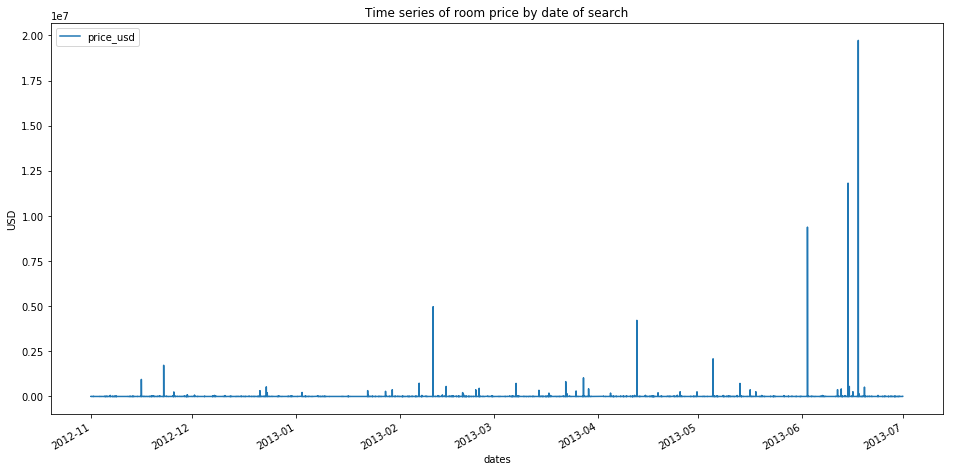

In [15]:
# Change time information to year and month columns
df["date_time"] = pd.to_datetime(df["date_time"])
df["year"] = df["date_time"].dt.year
df["month"] = df["date_time"].dt.month

df.plot(x = 'date_time', 
        y = 'price_usd', 
        figsize = (16, 8))

plt.xlabel('dates')
plt.ylabel('USD')
plt.title('Room price by date of search');
plt.plot();

#Delete column date-time
# df = df.drop('date_time', 1)

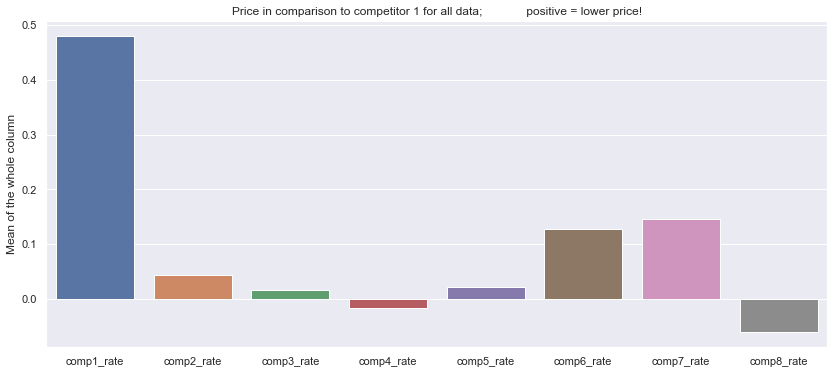

In [38]:
# Analyse comp_rate_diff --> difference in price for Expedia competitor
import seaborn as sns
sns.set()

compare_cols = ["comp1_rate", "comp2_rate", "comp3_rate", "comp4_rate", "comp5_rate",
                "comp6_rate", "comp7_rate", "comp8_rate"]

total_diff = []
[total_diff.append(np.mean(df[col])) for col in compare_cols]

def showcompareplot(compare_cols, total_diff, title):
    fig, ax = plt.subplots(figsize=(14,6))
    ax.set(ylabel='Mean of the whole column', title=title)
    sns.barplot(compare_cols, total_diff)

showcompareplot(compare_cols, total_diff, title="Price in comparison to competitor 1 for all data; \
            positive = lower price!")

## On average, Expedia has a lower price than competitor 1 for the hotel. For competitor 4, Expedia has a higher price (on average!). However, when we look at availability we see that for competitor 4, the availability is slightly higher than other competitors. On the other hand, this is only about 10%. 

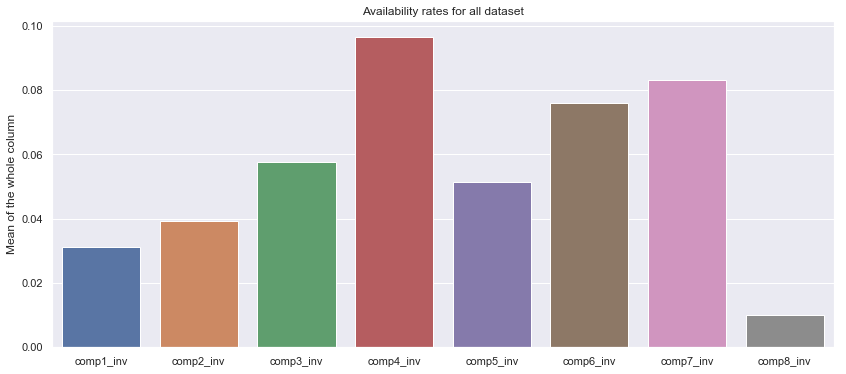

In [39]:
compare_cols = ["comp1_inv", "comp2_inv", "comp3_inv", "comp4_inv", "comp5_inv",
                "comp6_inv", "comp7_inv", "comp8_inv"]

total_diff = []
[total_diff.append(np.mean(df[col])) for col in compare_cols]
    
showcompareplot(compare_cols, total_diff, "Availability rates for all dataset")